In [6]:
from zipfile import ZipFile
file_name = 'Face-Classifier.zip'
with ZipFile(file_name , 'r') as zip:
    zip.extractall()
print('Done')


Done


In [5]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow.python'

In [7]:
data_dir = '/content/Face-Classifier/face_recognition/photos'

In [8]:

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 886 files belonging to 10 classes.
Using 709 files for training.


In [9]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 886 files belonging to 10 classes.
Using 177 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['20EC8003', '20EC8004', '20EC8011', '20EC8016', '20EC8017', '20EC8026', '20EC8060', '20EC8073', '20EC8081', '20EC8096']


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(6):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[i])
#     plt.axis("off")

In [11]:
num_classes =  len(class_names)
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=num_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(num_classes, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [12]:
# num_classes =  len(class_names)
# resnet_model = Sequential()

# pretrained_model= tf.keras.applications.VGG16(include_top=False,
#                    input_shape=(224,224,3),
#                    pooling='avg',classes=num_classes,
#                    weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# # resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(num_classes, activation='softmax'))

In [13]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 64)                131136    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 64)                0         
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 10)                650       
 apper)                                                 

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.01)


In [14]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:

epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,

  epochs=epochs
)

Epoch 1/5
23/23 [==============================] - 17s 220ms/step - loss: 1.3555 - accuracy: 0.5543 - val_loss: 0.3686 - val_accuracy: 0.9661
Epoch 2/5
23/23 [==============================] - 3s 131ms/step - loss: 0.5308 - accuracy: 0.8463 - val_loss: 0.0790 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 3s 122ms/step - loss: 0.2962 - accuracy: 0.9196 - val_loss: 0.0407 - val_accuracy: 0.9944
Epoch 4/5
23/23 [==============================] - 3s 121ms/step - loss: 0.2281 - accuracy: 0.9436 - val_loss: 0.0262 - val_accuracy: 0.9944
Epoch 5/5
23/23 [==============================] - 3s 126ms/step - loss: 0.1756 - accuracy: 0.9563 - val_loss: 0.0180 - val_accuracy: 0.9944


In [40]:
resnet_model.save('Face-Classifier.h5')

NotImplementedError: ignored

In [41]:
obj = tf.keras.models.load_model('Face-Classifier.h5')

ValueError: ignored

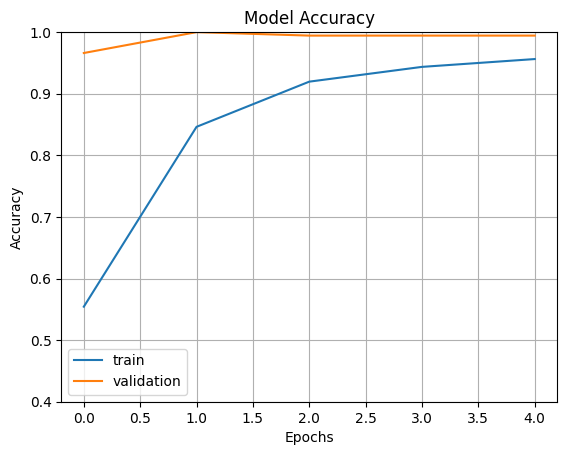

In [16]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

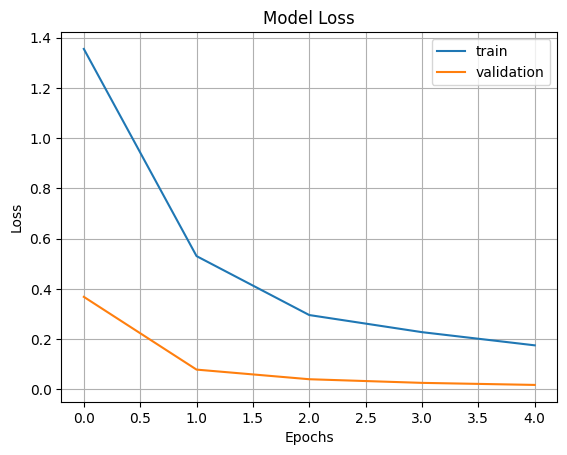

In [17]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
data_dirn = '/content/Face-Classifier/face_recognition/photos/20EC8011'

In [24]:
import glob
res = glob.glob(data_dirn + '/*.jpg')
res[6]

'/content/Face-Classifier/face_recognition/photos/20EC8011/20EC8011.21.jpg'

In [25]:

import cv2
image=cv2.imread(res[6])
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [26]:
pred=resnet_model.predict(image)
print(np.argmax(pred))

1/1 [==============================] - 1s 1s/step
2


In [27]:
print(class_names[0],
class_names[1],
class_names[2])

20EC8003 20EC8004 20EC8011


In [28]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 20EC8011


In [29]:
! pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00


In [30]:
from  mtcnn import MTCNN
import cv2
import os

In [31]:

detector = MTCNN()
cnt = -1

In [32]:
! pwd

/content


In [34]:
main = os.getcwd()
folder_name = os.path.join( main , '11.jpg')
img = cv2.imread(folder_name) # file path

vaild_img = []




faces = detector.detect_faces(img)
for face in  faces:
    x,y ,w ,h = face['box']
    if face['confidence'] >= 0.9:
        cnt = cnt+1
        cv2.rectangle(img , (x,y) , (x+w , y+h) , (255,0, 0), 3)
        cropped_img = img[y:y+h  , x:x+w]

        # file_name = str(cnt)+'.'+'jpg'  # file name of each photos
        # file_path = os.path.join(folder_name , file_name) # file path of each photos

        vaild_img.append(cropped_img)
        # cv2.imwrite(file_path , vaild_img[cnt]) # to save the photos at the output folder

print('no of faces are --->' , cnt )
print(len(vaild_img))

1/1 [==============================] - 0s 225ms/step
no of faces are ---> 0
1


In [35]:
for face in vaild_img:
  image_resized= cv2.resize(face, (224,224))
  image=np.expand_dims(image_resized,axis=0)
  pred=resnet_model.predict(image)
  output_class=class_names[np.argmax(pred)]
  print(output_class)


1/1 [==============================] - 0s 25ms/step
20EC8011
